In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
import torch

In [ ]:
#img11=cv2.imread("maze00.jpg")
img22=cv2.imread("maze00.jpg",0)

In [ ]:
def image_normalize(img):
  #sum_=np.sum(img,2)
  sum_=img
  for i,j in enumerate(sum_):
    for k,l in enumerate(j):
      if(l>100):
        sum_[i][k]=1
      else:
        sum_[i][k]=0
  """
  sum_[:padding,:]=1
  sum_[:,:padding]=1
  sum_[-padding:,:]=1
  sum_[:,-padding:]=1
  """
  return sum_#Removing padding

In [ ]:
#img1=image_normalize(img11)
img2=image_normalize(img22)

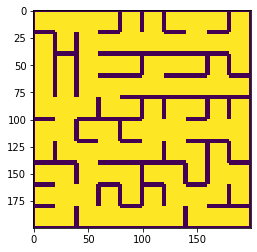

In [5]:
plt.imshow(img2)

In [6]:
img22.shape

(200, 200)

In [ ]:
image_sample=img2

In [ ]:
img=copy.deepcopy(image_sample)
start=(0,0)
end=(9,9)
cell_size=20
mark=2
padding=2
change=[(1,0),(-1,0),(0,1),(0,-1)]
total_size_coordinates=(img.shape[0]//cell_size,img.shape[1]//cell_size)
traced_path=np.zeros(total_size_coordinates)
number_matrix=np.zeros(total_size_coordinates)
number_id=np.zeros(total_size_coordinates)

In [ ]:
def repm(img,coordinate,fill=None,path_print=False,pad=2):
  actual_pos=tuple(map(lambda x:x*cell_size,coordinate))
  if fill is None:
    return img[actual_pos[0]:actual_pos[0]+cell_size,actual_pos[1]:actual_pos[1]+cell_size]
  if path_print:
    img[actual_pos[0]+pad:actual_pos[0]+cell_size-pad,actual_pos[1]+pad:actual_pos[1]+cell_size-pad]=fill
  else:
    traced_path[coordinate[0],coordinate[1]]=fill
  

In [ ]:
def find_direction(current):
  direction=[]
  CELL_SIZE=cell_size
  #Down
  if 0 not in current[CELL_SIZE//2:,CELL_SIZE//2]:
          #Check down center for 0's
    direction.append(0)
  #Up
  if 0 not in current[:CELL_SIZE//2,CELL_SIZE//2]:
    direction.append(1)
  #Right
  if 0 not in current[CELL_SIZE//2,CELL_SIZE//2:]:
    direction.append(2)
  #Left
  if 0 not in current[CELL_SIZE//2,:CELL_SIZE//2]:
    direction.append(3)

  return direction

In [ ]:
def flood(img,coordinate,mark,start):
  #We have to fill from end to start
  """
  if coordinate==start:
    current=repm(img,coordinate)
    if((1 in current)and((traced_path[coordinate[0],coordinate[1]]>mark)or(traced_path[coordinate[0],coordinate[1]]==0))):
      repm(img,coordinate,mark)
    return 1
  """
  current=repm(img,coordinate)
  if((1 in current)and((traced_path[coordinate[0],coordinate[1]]>mark)or(traced_path[coordinate[0],coordinate[1]]==0))):
    repm(img,coordinate,mark)
  else:
    return 1

  direction=find_direction(current)
  if coordinate==(7,3):
    pass
    print(coordinate)
    print(current)
    print(direction)
  for i in direction:
    flood(img,(coordinate[0]+change[i][0],coordinate[1]+change[i][1]),mark+1,start)#All posibble direction

In [ ]:
def identify(model,img):
  for i in range(number_id.shape[0]):
    for j in range(number_id.shape[1]):
      img_slice=repm(img,(i,j))
      out_array=model(img_slice)
      number=out_array.argmax()
      if out_array[number]>0.5:
        number_id[i][j]=1
        number_matrix[i][j]=number

In [22]:
img=copy.deepcopy(image_sample)
flood(img,end,mark,start)
#model=torch.load("digit_rec.pt")
#identifiy(model,img)

(7, 3)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[2, 3]


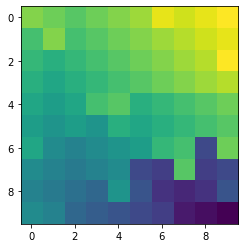

In [23]:
#print(number_id,number_matrix)
plt.imshow(traced_path)

In [ ]:
def trace(img,coordinate,end,path):
  if coordinate==end:
          #path.append(coordinate)
    return path
  #print(coordinate)
  dire=[]
  dirc=[]
  current=repm(img,coordinate)
  direction=find_direction(current)
  for i in direction:
    try:
      element=traced_path[coordinate[0]+change[i][0],coordinate[1]+change[i][1]]
      if element==0:
        continue
      if ((coordinate[0]+change[i][0]>=0)and(coordinate[1]+change[i][1]>=0)):
        dire.append(element)
        dirc.append(i)
    except:
      pass
  if coordinate==(1,1):
    print(current)
    print(coordinate,direction,dire,dirc)
  #down#up#left#right
  mi=min(dire)
  ind=dire.index(mi)
  path.append((coordinate[0]+change[dirc[ind]][0],coordinate[1]+change[dirc[ind]][1]))
  return trace(img,(coordinate[0]+change[dirc[ind]][0],coordinate[1]+change[dirc[ind]][1]),end,path)

In [ ]:
path=[start]
img=copy.deepcopy(image_sample)
path=trace(img,start,end,path)

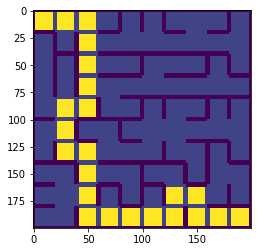

In [27]:
img_path_show=copy.deepcopy(image_sample)
for i,j in enumerate(path):
  repm(img_path_show,j,5,True)
plt.imshow(img_path_show)